# Funathon 2023 - Sujet 3

Responsables :
- Julie Sixou, D2E
- Antoine Palazzolo, SSP Lab
- Thomas Faria, SSP Lab

# Habitudes alimentaires à partir des données INCA

## Avant de commencer...

Ce sujet est disponible dans 2 langages : R et Python.
Ce notebook correspond à la version Python.

Il s'agit là principalement d'une initiation à l'analyse de données et à la data visualization, à travers l'étude des données de consommations et habitudes alimentaires de l'[étude INCA 3](https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/).
Le sujet est constituée de 3 parties distinctes et indépendantes :
- Analyse exploratoire des données et visualisations
- Clustering d'individus : ACP, K-moyennes, Clustering Ascendant Hiérarchique
- Prédiction de l'IMC : différentes approches de régression

Il est également possible de ne faire qu'une ou deux parties du sujet.

Si jamais vous n'êtes pas familiers avec l'une des thématiques du sujet, nous ne saurions que trop vous recommander de jeter un oeil aux ressources suivantes :
- Débuter avec Pandas : https://pythonds.linogaliana.fr/pandas/
- Une introduction au clustering : https://pythonds.linogaliana.fr/clustering/
- Une introduction aux régressions en Python : https://pythonds.linogaliana.fr/regression/

Pour en savoir plus sur les données utilisées pour ce sujet et sur le contexte de l'étude : https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/

Pour lire la documentation associée aux données : https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20210128-192017/notice-utilisateurs-donnees-inca3-data.gouvjanv21.pdf

### Imports

Exécutez à présent les cellules ci-dessous pour installer les packages nécessaires au sujet :

In [1]:
!pip install --quiet -r requirements.txt

In [12]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

Exécutez également les cellules ci-dessous pour importer l'ensemble des jeux de données nécessaires à l'étude :

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
# TODO
# Est-ce qu'on balance les codes d'imports directement ou bien on présente s3
# et on laisse les participants retrouver les codes d'imports à partir de là ?
# Possibilité aussi de laisser faire et ajouter correction à dérouler si besoin

## Partie 1 : Analyse exploratoire des données et visualisations

Compléter avec la partie de Julie

## Partie 2 : Clustering d'individus

Lorsque l'on pense au Machine Learning, les premiers exemples qui viennent en tête sont souvent des problèmes de régression ou bien de classification.
Ces cas d'usage font partie d'une branche du ML appelée _apprentissage supervisé_, qui requiert notamment d'avoir des données labellisées permettant aux diverses méthodes utilisées de comprendre la relation entre un ensemble de variables explicatives et une variable à prédire.

_L'apprentissage non supervisé_ est une autre branche du ML qui ne consiste cette fois plus à prédire une variable donnée à partir de données labellisées.
Au coeur de l'apprentissage non supervisé on trouve notamment le __clustering__.
Cette fois-ci, le but est de créer à partir d'une population donnée un ensemble de clusters (ou paquets) d'individus regroupés par similarité, en utilisant de façon automatiques les caractéristiques les plus discriminantes de notre population. Ce sera peut-être plus clair avec quelques exemples et applications :
- Une enseigne de retail possède une centaine de magasins en France et souhaite regrouper ces derniers en une poignée de groupes qu'elle pourra approvisionner de la même façon. Chaque groupe devra regrouper des magasins ayant des performances similaires et une clientèle proche. C'est un problème de clustering.
- A partir d'une base de données regroupant les thèmes de prédilection de centaines de journalistes (ou bien leurs références), on souhaite regrouper ces mêmes journalistes en quelques catégories au sein desquelles chaque individu aura une orientation politique proche de celles des autres.
- En fonction des caractéristiques physiques d'espèces animales ou végétales, on souhaite regrouper ces espèces en un plus petit nombre de groupes.



Il existe plusieurs méthodes pour faire du clustering, les deux plus connues étant :
- Les [K-Moyennes](https://fr.wikipedia.org/wiki/K-moyennes) (ou K-Means), méthode la plus connue, basée sur l'utilisation de centroïdes itérés
- Le [Clustering Ascendant Hiérarchique](https://fr.wikipedia.org/wiki/Regroupement_hi%C3%A9rarchique) (CAH), basé sur des regroupements en groupes de plus en plus grands, donnant par exemple lieu à des visualisations sous forme de dendrogrammes (ressemblant aux arbres phylogénétiques de vos cours de SVT au lycée)

Nous allons mettre en pratique ces deux méthodes dans ce sujet.

Une fois nos clusterings effectués, l'un des enjeux est ensuite aussi de pouvoir interpréter ces derniers :
- Quelles sont les caractéristiques les plus discriminantes dans la constitution des groupes ?
- Les clusters générés font-ils bien sens ? Que peut-on dire de ces groupes ?
- Quelles méthodes de visualisation sont les plus adaptées ?

Pour répondre à ces questions, un des outils principaux que nous pouvons utiliser est l'[Analyse en Composantes Principales](https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales) (ACP), qui à partir de l'ensemble initial des colonnes en crée un ensemble de taille réduite qui maximise la discrimination des données les unes par rapport aux autres via ces nouvelles colonnes.
En réduisant la dimension à moins de 3, on peut ainsi représenter graphiquement les données de façon plus claire.

### 1. Preprocessing des données

Pour cette étude nous allons commencer par la table des habitudes individuelles.
Cette table contient les données des questionnaires auto-administrés relatifs aux volets « Habitudes alimentaires » et « Origine des aliments ».

Elle regroupe les informations suivantes : lieux et occasions de consommation, consommations hors-foyer et entre les repas, préférences alimentaires, présence de sel/beurre/sauce sur la table au moment des repas, lecture des étiquettes, sources d’informations en alimentation, consommation de denrées animales crues et des croûtes de fromage, préparation des fruits et légumes crus, spécificités de l’alimentation des enfants de 0 à 35 mois (ex : allaitement (exclusif ou partiel), type de laits consommés, diversification alimentaire, matériaux des biberons et des tétines, préparation, stockage et conservation des biberons de lait, mode de chauffage des laits et contenants utilisés), autoconsommation et utilisation de produits phytosanitaires au potager, consommation d’aliments issus de l’agriculture biologique et cuisson des aliments au barbecue.

In [20]:
habitudes_indiv.shape

(4372, 389)

In [13]:
habitudes_indiv.head(3)

,POPULATION,NOIND,periode_reference,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfantmidi_autre_libelle,repasenfant_freq,conso_bebe_sein,lait_plussouvent,lait_plusvt_li_autr_anim_libelle,lait_plusvt_pi_autre_veg_libelle,lait_plusvt_boisson_veg_libelle,lait_plusvt_autre_anim_libelle,lait_plusvt_autre_libelle,lait_occ_laitmaternel,lait_occ_lait_1e_age,lait_occ_lait_2e_age,lait_occ_lait_croissance,lait_occ_li_autre_anim,lait_occ_li_autre_anim_libelle,lait_occ_li1e_age_protsoja,lait_occ_li2e_age_protsoja,lait_occ_soja_croissance,lait_occ_li1e_age_protriz,lait_occ_li2e_age_protriz,lait_occ_riz_croissance,lait_occ_pi_autre_veg,lait_occ_pi_autre_veg_libelle,lait_occ_boisson_lait_bebe,lait_occ_lait_regime_infantile,lait_occ_lait_vache,lait_occ_boisson_soja,lait_occ_boisson_veg,lait_occ_boisson_veg_libelle,lait_occ_autre_anim,lait_occ_autre_anim_libelle,lait_occ_autre,lait_occ_autre_libelle,lait_occ_aucun,lait_occ_nsp,etablissement_scolaire,lieu_repas_midi,lieu_repas_midi_autre_libelle,cantine_freq,cantine_jms_persfoyer,cantine_jms_veutpas,cantine_jms_probsante,cantine_jms_repaspasequilibre,cantine_jms_repaspasqualite,cantine_jms_repaschers,cantine_jms_ecoleproche,cantine_jms_paspropose,cantine_jms_pasaime,cantine_jms_autre_raison,cantine_jms_autre_raison_libelle,cantine_jms_nsp,collation_freq,collation_aliment1,collation_aliment2,collation_aliment3,collation_aliment4,collation_matin_freq,collation_matin_ecole_freq,collation_matin_pasecole_freq,collation_matin_aliment1,collation_matin_aliment2,collation_matin_aliment3,collation_matin_aliment4,distributeur_freq,distributeur_biscuits_sales,distributeur_biscuits_sucres,distributeur_barres_choco,distributeur_confiseries,distributeur_fruits_frais,distributeur_jus_de_fruits,distributeur_boissons_energ,distributeur_sodas,distributeur_eaux,distributeur_autre,distributeur_autre_libelle,distributeur_nsp,restaurationrapide_freq,aime_legumes,aime_viande,aime_fruits,aime_glaces,aime_fromage,aime_poisson,aime_soda,aime_lait,aime_yaourts,aime_jus_de_fruits,table_beurre,table_creme_fraiche,table_huile_olive,table_vinaigrette,table_mayonnaise,table_ketchup,table_sauce_soja,table_sel,etiquette_freq,etiquette_ingredients,etiquette_contenu_nutri,etiquette_portions,etiquette_message_nutri,etiquette_effets_benefiques,source_medecins,source_personnels_pharma,source_publicite,source_emissions_info,source_journaux,source_livres,source_professeurs,source_famille,source_amis,source_internet,source_emballages,source_autre,source_autre_libelle,conso_lardons_crus,conso_saucisses_crues,conso_viande_boeuf_crue,conso_viande_cheval_crue,conso_viande_porc_crue,conso_viande_volaille_crue,conso_poisson_cru,conso_mollusques_crus,conso_oeufs_crus,conso_croute_fleurie,conso_croute_lavee,conso_pate_pressee_non_cuite,conso_pate_pressee_cuite,conso_pate_persillee,pomme_crue_lave,pomme_crue_essuie,pomme_crue_epluche,pomme_crue_rien,pomme_crue_mange_pas,peche_crue_lave,peche_crue_essuie,peche_crue_epluche,peche_crue_rien,peche_crue_mange_pas,raisin_cru_lave,raisin_cru_essuie,raisin_cru_epluche,raisin_cru_rien,raisin_cru_mange_pas,fraise_crue_lave,fraise_crue_essuie,fraise_crue_epluche,fraise_crue_rien,fraise_crue_mange_pas,tomate_crue_lave,tomate_crue_essuie,tomate_crue_epluche,tomate_crue_rien,tomate_crue_mange_pas,champignon_cru_lave,champignon_cru_essuie,champignon_cru_epluche,champignon_cru_rien,champignon_cru_mange_pas,salade_crue_lave,salade_crue_essuie,salade_crue_epluche,salade_crue_rien,salade_crue_mange_pas,concombre_cru_lave,concombre_cru_essuie,concombre_cru_epluche,concombre_cru_rien,concombre_cru_mange_pas,utilisation_bib,bib_plastique,bib_verre,bib_nsp,sterilisation_bib,sterilisation_bib_libelle,tetine_caoutchouc,tetine_silicone,tetine_nsp,sterilisation_tetine,sterilisation_tetine_libelle,bib_lm,bib_li,bib_lc,bib_bl,bib_ppl,bib_eau,bib_jus,bib_autre,bib_autre_libelle,stockage_bib_lm,delai_conso_bib_lm,prepa_bib_li,conserv_eau,conserv_eau_libelle,

#### Etape 1 : Analyse exploratoire & sélection de variables

Regardons déjà à quoi ressemblent nos données en pratique. En utilisant Pandas, pouvez-vous dire :
- Combien y a-t-il d'individus et de variables ?
- Combien de variables présentent des valeurs vides ? En quelle proportion ?
- Y a-t-il des variables qui ont la même valeur pour tous les individus ? Seront-elles utiles pour la discrimination des observations dans le clustering ?
- Y a-t-il des variables qui n'ont pas de sens pour la caractérisation d'un groupe ? Cela comprend par exemple les identifiants.
- Quels sont les types des variables ? Combien de variables non-numériques ? En pratique nous allons ici nous focaliser uniquement sur les données numériques de la table.

In [ ]:
# A vous de jouer !

# TODO

A partir des analyses que vous venez de réaliser, vous devriez avoir une meilleure idée de quoi garder dans la table pour appliquer les méthodes de clustering. Créez donc ```habitudes_indiv_clustering_1``` à partir de ```habitudes_indiv``` en retirant toutes les colonnes gênantes ou inutiles :

<details>
<summary> Si besoin, dérouler pour révéler les indications plus détaillées :</summary>
<br>

Il vous faudra donc, a minima :
- Retirer les colonnes d'identifiants
- Retirer les colonnes vides
- Conserver uniquement les colonnes numériques

Pour aller plus loin, retirez les colonnes à moins de 2 valeurs distinctes.

</details>


In [ ]:
habitudes_indiv_clustering_1 = # TODO

habitudes_indiv_clustering_1.shape

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
# Sélectionner les caractéristiques pour le clustering

habitudes_indiv_clustering_1 = habitudes_indiv.drop(
    ['POPULATION', 'NOIND', 'periode_reference'],  # Identifiants
    axis=1
).dropna(
    axis=1, how='all'  # Colonnes vides
).select_dtypes(
    include=np.number  # Colonnes numériques à garder
)

habitudes_indiv_clustering_1 = habitudes_indiv_clustering_1.loc[
    :, habitudes_indiv_clustering_1.nunique() > 1
]  # On retire les colonnes avec moins de 2 valeurs distinctes

habitudes_indiv_clustering_1.shape
```

</details>


#### Etape 2 : Imputation

Comme vous l'avez peut-être vu, si l'on cherche à retirer toutes les lignes ou colonnes avec au moins une valeur manquante, il ne reste plus grand-chose à la table...
Nous allons donc les garder, d'autant plus que cela ne les empêche pas de contenir de l'information importante.

Dans ce cas comment traiter les NaNs ?
Il existe une méthode pour les remplacer par une valeur numérique, il s'agit de l'__[imputation](https://fr.wikipedia.org/wiki/Imputation_(statistique))__.

Plusieurs méthodes d'imputation existent : remplacer les valeurs manquantes par la moyenne de la colonne, par une valeur issue de régression linéaire, de régression stochastique, etc.

Dans notre cas particulier, la plupart des variables sont binaires, des réponses Oui/Non à une question.
Une méthode que nous pouvons donc utiliser (mais d'autres marcheraient très bien aussi) est l'imputation par la valeur la plus fréquente de la colonne.

En termes d'interprétation, cela revient à simplifier le problème en considérant que les non-répondants auraient répondu la même chose que la majorité des répondants, quitte à ce que cela mène à de possibles erreurs.
Par exemple, les répondants "Homme" ont peu de chances de répondre "Oui" à l'allaitement, mais c'est une solution qui fonctionne tout de même en général très bien.

<br>

A présent, appliquez cette stratégie d'imputation sur la table ```habitudes_indiv_clustering_1``` pour donner naissance à ```habitudes_indiv_clustering_2```. On demandera à ce que la table nouvellement créée soit sous la forme d'un array numpy, pour faciliter la suite des opérations.

Vous avez le droit d'importer et utiliser la fonction ```SimpleImputer``` du package ```sklearn.impute```, dont l'output est déjà bien sous un format numpy.

In [18]:
import numpy as np

In [ ]:
habitudes_indiv_clustering_2 =  # TODO

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
from sklearn.impute import SimpleImputer

# Gérer les valeurs manquantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
habitudes_indiv_clustering_2 = imputer.fit_transform(habitudes_indiv_clustering_1)
```

</details>


#### Etape 3 : Normalisation des colonnes

Pour la plupart des méthodes que nous allons utiliser, nous ne souhaitons pas nécessairement donner plus d'importance à une colonne qu'à une autre.
Or pour plusieurs des fonctions que nous allons manipuler, le poids affecté à une colonne peut dépendre de sa moyenne ou de sa variance.

Ici, les questions étant pour la plupart binaires, nous ne voulons pas qu'une question avec davantage de réponses positives ait une importance plus grande qu'une autre.
Nous devons donc renormaliser les colonnes pour corriger ce problème.

<br>

A vous de jouer : renormalisez l'ensemble des colonnes pour amener leur moyenne à 0 et leur variance à 1. Vous stockerez le résultat dans le tableau ```habitudes_indiv_clustering_3```.

Vous pouvez importer et utiliser la fonction ```StandardScaler``` du package ```sklearn.preprocessing```.

In [ ]:
habitudes_indiv_clustering_3 = # TODO

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
from sklearn.preprocessing import StandardScaler

# Normaliser les colonnes
scaler = StandardScaler()
habitudes_indiv_clustering_3 = scaler.fit_transform(habitudes_indiv_clustering_2)
```

</details>


#### Etape 4 : Gestion des outliers

Dans ce type de questionnaire il n'est pas rare de trouver des observations aberrantes, par exemple en raison d'individus répondant de façon absurde aux questions.
De façon générale, si la base de données est suffisamment grande et que l'on ne s'intéresse pas nécessairement à chaque individu, une bonne pratique peut être de retirer les outliers de notre base.
Cela permet en effet de limiter les risques d'avoir des clusters à un seul individu ne représentant rien d'intéressant ou d'avoir des visualisations déformées par une observation très loin par rapport aux autres.

A vous de jouer : retirez les outliers de la table ```habitudes_indiv_clustering_3```, disons 5% des observations, et stockez le résultat dans la table ```habitudes_indiv_clustering_4```.

Vous pouvez importer et utiliser la fonction ```IsolationForest``` du package ```sklearn.ensemble```.

In [ ]:
habitudes_indiv_clustering_4 = # TODO

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
from sklearn.ensemble import IsolationForest

# Détecter et retirer les outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=0)
outlier_labels = outlier_detector.fit_predict(habitudes_indiv_clustering_3)
habitudes_indiv_clustering_4 = habitudes_indiv_clustering_3[outlier_labels == 1]

habitudes_indiv_clustering_4.shape
```

</details>

Si vous le souhaitez, vous pourrez dans un second temps reproduire la suite sans retirer les outliers pour comparer les résultats obtenus.

<br>

Vous avez à présent terminé le preprocessing de la table pour la partie Clustering.
Libre à vous de rajouter des opérations supplémentaires si vous en voyez le besoin.
Sinon nous pouvons rentrer dans le vif du sujet.

Pour simplifier les notations, exécutez la cellule ci-dessous :

In [ ]:
habitudes_indiv_clustering = np.copy(habitudes_indiv_clustering_4)

### 2. Le clustering en lui-même

Dans cette partie, nous allons mettre en pratique les 2 méthodes de clustering les plus classiques :
- Les K-Moyennes (ou K-Means)
- Le Clustering Ascendant Hiérarchique (CAH)

#### K-Moyennes

Dans ce sujet, nous ne revenons pas sur la théorie derrière l'algorithme du K-Means.
Donc si vous êtes intéressés pour savoir ce qui se passe derrière l'utilisation du package en boîte noire, la documentation sur cette thématique est largement disponible sur Internet.

##### Choisir le nombre de clusters

Une particularité des K-moyennes est qu'il faut choisir en amont de l'application de l'algorithme le nombre de clusters (ou de centroïdes) ```k```, a priori sans savoir quel serait le nombre optimal.
Il existe plusieurs méthodes pour faire ce choix :
- S'il existe des contraintes métier ou des interprétations relatives au "monde réel" imposant une valeur de ```k```
- En utilisant la méthode dite du __coude__, qui est la façon la plus simple d'avoir une idée de ```k``` à utiliser.
    + Le principe est de lancer le K-means avec plusieurs valeurs de ```k```, représenter une mesure de la distance moyenne intra-clusters en fonction de ```k``` et trouver le premier point d'inflexion
    + En revanche, le ```k``` renvoyé n'est pas toujours stable et parfois peu pertinent.
- En utilisant la méthode dite de __silhouette__, méthode a priori plus fine mais un peu plus complexe que celle du coude
    + Le score à maximiser par rapport à ```k``` est cette fois la moyenne d'une mesure de la similitude d’une observation à l’intérieur d’un groupe par rapport à d’autres groupes pour chaque point

A titre d'exemple, utilisez la méthode du coude pour trouver le nombre optimal de clusters pour les données de ```habitudes_indiv_clustering```. On cherchera un ```k``` compris entre 1 et 10.

Vous pouvez importer et utiliser la fonction ```KElbowVisualizer``` du package ```yellowbrick.cluster```.

In [ ]:
# TODO

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
from yellowbrick.cluster import KElbowVisualizer

elbow_method = KElbowVisualizer(KMeans(), k=(1,10))
elbow_method.fit(habitudes_indiv_clustering)
```

</details>

Quel est le ```k``` obtenu ? Cette valeur reste-t-elle la même si vous lancez la méthode plusieurs fois ?

S'il n'y a pas de point d'inflexion (ou coude) bien défini sur le graphique produit, la valeur peut souvent varier. Pour la suite du sujet, nous conserverons une valeur fixe, que vous pourrez modifier par la suite si vous le souhaitez. Exécutez la ligne ci-dessous :

In [3]:
k_kmeans = 3

##### Le clustering en lui-même

Une fois les données préprocessées et le ```k``` déterminé, clusteriser les données n'est plus très difficile.

A l'aide de la documentation de la fonction ```KMeans()``` du package ```sklearn.cluster```, créez le vecteur ```clusters_kmeans``` des clusters obtenus par la méthode des K-moyennes :

In [ ]:
# TODO

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k_kmeans, random_state=0)
clusters_kmeans = kmeans.fit_predict(habitudes_indiv_clustering)
```

</details>

Félicitations, vous avez désormais vos clusters !
Pouvez-vous dire quelle est la taille de chacun ? Ces valeurs sont-elles proches les unes des autres ? Pouvez-vous déjà interpréter vos résultats ?

In [ ]:
# TODO

On a certes obtenu nos clusters, mais tout cela n'est pas encore très visuel...

Mais pas de panique, plus que quelques cellules à attendre pour passer à la visualisation par ACP !

#### Clustering Ascendant Hiérarchique

Avant de passer à la visualisation, nous allons nous attarder sur une autre méthode de clustering, à peu près équivalente aux K-moyennes en termes de performances, mais dont les résultats sont beaucoup plus visuels : le [CAH](https://www.xlstat.com/fr/solutions/fonctionnalites/classification-ascendante-hierarchique-cah). Comment est-ce que ça marche ?

- On commence par calculer la dissimilarité entre nos N individus, ie leur distance deux à deux dans l'espace de nos variables
- Puis on regroupe les deux individus dont le regroupement minimise un critère d'agrégation donné, créant ainsi une classe comprenant ces deux individus.
- On calcule ensuite la dissimilarité entre cette classe et les N-2 autres individus en utilisant le critère d'agrégation.
- Puis on regroupe les deux individus ou classes d'individus dont le regroupement minimise le critère d'agrégation.
- On continue ainsi jusqu'à ce que tous les individus soient regroupés.

Ces regroupements successifs produisent un arbre binaire de classification (_dendrogramme_), dont la racine correspond à la classe regroupant l'ensemble des individus.
Ce dendrogramme représente une hiérarchie de partitions.
On peut alors choisir une partition en tronquant l'arbre à un niveau donné, le niveau dépendant soit des contraintes de l'utilisateur, soit de critères plus objectifs.

<br>

Dans ce sujet, nous allons nous limiter à la méthode d'agrégation la plus standard, dite de __Ward__.
En utilisant la fonction ```linkage``` du package ```scipy.cluster.hierarchy```, créez les regroupements successifs mentionnés plus haut.
Le résultat tient en deux lignes.

In [ ]:
regroupements = # TODO

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
from scipy.cluster.hierarchy import linkage

# Utiliser la méthode linkage pour effectuer le clustering hiérarchique
regroupements = linkage(habitudes_indiv_clustering, method='ward')
```

</details>

Maintenant les regroupements effectués, nous pouvons dessiner le dendrogramme les représentant.
Pour des contraintes de lisibilité, nous vous demanderons de limiter l'affichage de l'arbre à une profondeur de 6.

En utilisant les packages ```matplotlib.pyplot``` et ```sklearn.cluster.hierarchy```, représentez le dendrogramme :

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster.hierarchy import dendrogram

profondeur_a_afficher = 6

plt.figure(figsize=(10, 5))
# TODO
plt.show()

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
import matplotlib.pyplot as plt
from sklearn.cluster.hierarchy import dendrogram

profondeur_a_afficher = 6

# Afficher le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(regroupements,
           truncate_mode='level',
           p=profondeur_a_afficher)

plt.title("Dendrogramme sur la table des habitudes alimentaires")
plt.xlabel("Classes d'individus")
plt.ylabel("Distance entre les classes")
plt.show()
```

</details>

Si tout s'est bien passé jusqu'ici, vous devriez avoir un magnifique dendrogramme sous les yeux !

Cependant une question demeure : jusque-là la problématique du nombre de clusters à utiliser ne s'est toujours pas posée, comment allons-nous choisir maintenant ?
Encore une fois, des contraintes du monde réel peuvent venir diriger le choix.
Si ce n'est pas le cas, on peut faire par rapport à l'allure du dendrogramme, en choisissant une coupe horizontale de l'arbre cohérente.
Cette coupe détermine alors les clusters finaux.

En utilisant la fonction ```fcluster``` du package ```sklearn.cluster.hierarchy```, réalisez cette coupe du dendrogramme au niveau ```k_cah = 3``` pour créer le vecteur ```clusters_cah``` des clusters obtenus par CAH. Une fois les clusters générés, que pouvez-vous en dire ? Est-ce cohérent avec votre dendrogramme ?

Une fois le reste du sujet effectué, vous pourrez également reprendre cette partie avec ```k_cah = 4```.

In [ ]:
k_cah = 3  # Nombre de clusters souhaité

# TODO

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
from sklearn.cluster.hierarchy import fcluster

k_cah = 3  # Nombre de clusters souhaité
clusters_cah = fcluster(regroupements, k_cah, criterion='maxclust')
```

</details>

Maintenant les clusters obtenus par deux méthodes différentes, il est temps de passer à la visualisation !

### 3. Visualisations et interprétations

#### Réaliser l'ACP

La méthode la plus simple pour visualiser nos clusters serait de représenter chaque individu dans l'espace à N dimensions des variables de la table, et colorier chaque individu en fonction de son cluster.
On pourrait alors bien différencier les variables les plus discrimantes et les différents groupes.
Un seul problème ici : dès que N > 3, nous avons du mal à représenter le résultat de façon intelligible...

C'est là qu'intervient __l'Analyse en Composantes Principales__ ([ACP](https://www.xlstat.com/fr/solutions/fonctionnalites/analyse-en-composantes-principales-acp)), qui permet de projeter notre espace à haute dimension dans un espace de dimension plus petite.
La contrainte majeure de la projection est de pouvoir conserver le maximum d'information (mesurée par la variance totale de l'ensemble de données) dans notre nombre réduit de dimensions, appelées composantes principales.
En se limitant à 2 ou 3 dimensions, on peut ainsi se représenter visuellement les relations entre les observations avec une perte de fiabilité minimale.

Dans notre situation, on peut espérer que les clusters déterminés dans notre espace à N dimensions se différencient bien sur notre projection par ACP, et que la composition des composantes principales en fonction des variables initiales permette d'interpréter les clusters obtenus. Nous allons donc tester cette hypothèse !

<br>

Nous allons commencer par le calcul des 3 composantes principales. Créez :
- Un dataframe ```composantes_principales``` avec les mêmes colonnes que ```habitudes_indiv_clustering```, de longueur 3, où la ligne i correspond à la i-ème composante principale obtenue par l'ACP, et où chaque case correspond à la contribution relative de la variable j à à la composante i.
- Un dataframe ```projection_individus``` correspondant à la projection des individus de ```habitudes_indiv_clustering``` dans l'espace des composantes principales. Ce dataframe aura donc 3 colonnes, que l'on pourra nommer [PC1, PC2, PC3].

Vous pourrez utiliser la fonction ```PCA``` du package ```sklearn.decomposition``` ainsi que les différentes méthodes associées.

In [ ]:
nb_composantes_principales = 3

# TODO

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
from sklearn.decomposition import PCA

nb_composantes_principales = 3

# Effectuer l'ACP
acp = PCA(n_components=nb_composantes_principales)
projection_individus_array = acp.fit_transform(habitudes_indiv_clustering)
projection_individus = pd.DataFrame(data=projection_individus_array, columns=['PC1', 'PC2', 'PC3'])

# Obtenir les poids des caractéristiques pour chaque composante principale
composantes_principales = pd.DataFrame(acp.components_, columns=habitudes_indiv_clustering.columns)
```

</details>

Maintenant l'ACP terminée, nous allons tâcher d'interpréter les composantes principales obtenues.
En effet, la combinaison linéaire des colonnes donnant naissance à nos nouveaux axes a souvent un "sens" dans le monde réel :
- Soit parce qu'une petite poignée de variables représente la majorité de la composante
- Soit parce que la plupart des colonnes intervenant dans la composante sommée se combinent bien pour former une interprétation naturelle.

Ici, cela pourrait par exemple être :
- La 1ère composante quasiment égale à une somme des variables "Mange bio", "Mange de saison" et "Mange local", montrant ainsi que l'axe le plus discriminant serait le fait pour un individu de se nourrir de façon plus ou moins écologique.
- La 2è composante définie comme la somme pour tous les sports de la variable "Pratique x sport régulièrement", donnant ainsi un second axe discriminant les individus plus ou moins sportifs

Voyons ce que cela donne sur nos données. En utilisant la table ```composantes_principales``` et la fonction ```barh``` du package ```matplotlib.pyplot```, représentez les 20 variables les plus importantes (en termes de poids absolu) pour la 1ère composante de l'ACP, ainsi que leur contribution relative à la composante.

In [ ]:
nb_top_features = 20

# TODO

plt.show()

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}
nb_top_features = 20

# Sélectionner les 20 caractéristiques les plus importantes pour PC1
pc1_top_features_abs = composantes_principales.iloc[0].abs().nlargest(nb_top_features, keep='all')
pc1_top_features = composantes_principales.iloc[0].loc[pc1_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_top_features.index, pc1_top_features.values)
plt.title(f'{nb_top_features} variables les plus représentées pour PC1')
plt.xlabel('Poids')
plt.ylabel('Variables')
plt.show()
```

</details>

Faites ensuite la même chose pour PC2 et pour PC3.

In [ ]:
# TODO

A présent, comment pouvez-vous interpréter vos résultats ?
Êtes-vous capables de donner un sens aux combinaisons linéaires obtenues ?
Peut-on renommer nos variables "PC1", "PC2, "PC3" ?

Si vous ne vous souvenez plus de la signification des variables, vous pouvez retrouver le dictionnaire des variables ici : https://static.data.gouv.fr/resources/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/20210128-192017/notice-utilisateurs-donnees-inca3-data.gouvjanv21.pdf

<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

Il n'est pas garanti que vous retrouviez exactement les mêmes résultats, mais voici une proposition d'interprétation suite à l'exécution des codes du corrigé :
- PC1 : Une mesure agrégée représentant à quel point l'individu a tendance à produire lui-même ce qu'il mange
    - Nombreuses variables commençant par "autoproduction" et "autoconso" avec des poids positifs
- PC2 : Une mesure agrégée représentant à quel point l'individu a tendance à manger bio
    - Nombreuses variables contenant le mot "bio" avec des poids positifs
- PC3 : Plus difficile à interpréter, une mesure agrégée de préférences alimentaires liées aux produits frais
    - A quel point l'individu est-il prompt à manger frais (fruits & légumes, produits laitiers) ?

</details>

#### Et le clustering dans tout ça ?

Nous avons notre projection sur 2 ou 3 dimensions, nous avons interprété ces nouveaux axes, il s'agit donc maintenant de faire ce pour quoi l'ACP a initialement été réalisée : l'observation des clusters.

Pour commencer, créez la table ```projection_individus_et_clusters``` concaténant les tables ```projection_individus```, ```clusters_kmeans``` et ```clusters_cah```:

In [ ]:
# TODO

In [ ]:
<details>
<summary> Dérouler pour révéler le corrigé</summary>
<br>

```{python}

```

</details>

### 4. Pour aller plus loin

## Partie 3 : Prédiction de l'IMC

Compléter avec la partie de Thomas

## Imports

### Packages

In [3]:
from sklearn.decomposition import PCA

### Données

#### Tables relatives aux habitudes des individus ou des ménages

##### Table HABITUDES_INDIV (page 27)

Cette table contient les données des questionnaires auto-administrés relatifs aux volets « Habitudes alimentaires » et « Origine des aliments ».

Elle regroupe les informations suivantes : lieux et occasions de consommation, consommations hors-foyer et entre les repas, préférences alimentaires, présence de
sel/beurre/sauce sur la table au moment des repas, lecture des étiquettes, sources d’informations en alimentation, consommation de denrées animales crues et des
croûtes de fromage, préparation des fruits et légumes crus, spécificités de l’alimentation des enfants de 0 à 35 mois (ex : allaitement (exclusif ou partiel), type de laits consommés, diversification alimentaire, matériaux des biberons et des tétines, préparation, stockage et conservation des biberons de lait, mode de chauffage des laits et contenants utilisés), autoconsommation et utilisation de produits phytosanitaires au potager, consommation d’aliments issus de l’agriculture biologique et cuisson des aliments au barbecue.

In [5]:
habitudes_indiv = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/099351b9-e32e-4e38-8f23-dec21fd07c71",
                            sep=";"
                            ).infer_objects()
print(f'{len(habitudes_indiv)} lignes et {len(habitudes_indiv.columns)} colonnes')
habitudes_indiv.head(3)

4372 lignes et 389 colonnes


,POPULATION,NOIND,periode_reference,repasenfantmidi_vous,repasenfantmidi_am,repasenfantmidi_creche,repasenfantmidi_parent,repasenfantmidi_autre,repasenfantmidi_autre_libelle,repasenfant_freq,conso_bebe_sein,lait_plussouvent,lait_plusvt_li_autr_anim_libelle,lait_plusvt_pi_autre_veg_libelle,lait_plusvt_boisson_veg_libelle,lait_plusvt_autre_anim_libelle,lait_plusvt_autre_libelle,lait_occ_laitmaternel,lait_occ_lait_1e_age,lait_occ_lait_2e_age,lait_occ_lait_croissance,lait_occ_li_autre_anim,lait_occ_li_autre_anim_libelle,lait_occ_li1e_age_protsoja,lait_occ_li2e_age_protsoja,lait_occ_soja_croissance,lait_occ_li1e_age_protriz,lait_occ_li2e_age_protriz,lait_occ_riz_croissance,lait_occ_pi_autre_veg,lait_occ_pi_autre_veg_libelle,lait_occ_boisson_lait_bebe,lait_occ_lait_regime_infantile,lait_occ_lait_vache,lait_occ_boisson_soja,lait_occ_boisson_veg,lait_occ_boisson_veg_libelle,lait_occ_autre_anim,lait_occ_autre_anim_libelle,lait_occ_autre,lait_occ_autre_libelle,lait_occ_aucun,lait_occ_nsp,etablissement_scolaire,lieu_repas_midi,lieu_repas_midi_autre_libelle,cantine_freq,cantine_jms_persfoyer,cantine_jms_veutpas,cantine_jms_probsante,cantine_jms_repaspasequilibre,cantine_jms_repaspasqualite,cantine_jms_repaschers,cantine_jms_ecoleproche,cantine_jms_paspropose,cantine_jms_pasaime,cantine_jms_autre_raison,cantine_jms_autre_raison_libelle,cantine_jms_nsp,collation_freq,collation_aliment1,collation_aliment2,collation_aliment3,collation_aliment4,collation_matin_freq,collation_matin_ecole_freq,collation_matin_pasecole_freq,collation_matin_aliment1,collation_matin_aliment2,collation_matin_aliment3,collation_matin_aliment4,distributeur_freq,distributeur_biscuits_sales,distributeur_biscuits_sucres,distributeur_barres_choco,distributeur_confiseries,distributeur_fruits_frais,distributeur_jus_de_fruits,distributeur_boissons_energ,distributeur_sodas,distributeur_eaux,distributeur_autre,distributeur_autre_libelle,distributeur_nsp,restaurationrapide_freq,aime_legumes,aime_viande,aime_fruits,aime_glaces,aime_fromage,aime_poisson,aime_soda,aime_lait,aime_yaourts,aime_jus_de_fruits,table_beurre,table_creme_fraiche,table_huile_olive,table_vinaigrette,table_mayonnaise,table_ketchup,table_sauce_soja,table_sel,etiquette_freq,etiquette_ingredients,etiquette_contenu_nutri,etiquette_portions,etiquette_message_nutri,etiquette_effets_benefiques,source_medecins,source_personnels_pharma,source_publicite,source_emissions_info,source_journaux,source_livres,source_professeurs,source_famille,source_amis,source_internet,source_emballages,source_autre,source_autre_libelle,conso_lardons_crus,conso_saucisses_crues,conso_viande_boeuf_crue,conso_viande_cheval_crue,conso_viande_porc_crue,conso_viande_volaille_crue,conso_poisson_cru,conso_mollusques_crus,conso_oeufs_crus,conso_croute_fleurie,conso_croute_lavee,conso_pate_pressee_non_cuite,conso_pate_pressee_cuite,conso_pate_persillee,pomme_crue_lave,pomme_crue_essuie,pomme_crue_epluche,pomme_crue_rien,pomme_crue_mange_pas,peche_crue_lave,peche_crue_essuie,peche_crue_epluche,peche_crue_rien,peche_crue_mange_pas,raisin_cru_lave,raisin_cru_essuie,raisin_cru_epluche,raisin_cru_rien,raisin_cru_mange_pas,fraise_crue_lave,fraise_crue_essuie,fraise_crue_epluche,fraise_crue_rien,fraise_crue_mange_pas,tomate_crue_lave,tomate_crue_essuie,tomate_crue_epluche,tomate_crue_rien,tomate_crue_mange_pas,champignon_cru_lave,champignon_cru_essuie,champignon_cru_epluche,champignon_cru_rien,champignon_cru_mange_pas,salade_crue_lave,salade_crue_essuie,salade_crue_epluche,salade_crue_rien,salade_crue_mange_pas,concombre_cru_lave,concombre_cru_essuie,concombre_cru_epluche,concombre_cru_rien,concombre_cru_mange_pas,utilisation_bib,bib_plastique,bib_verre,bib_nsp,sterilisation_bib,sterilisation_bib_libelle,tetine_caoutchouc,tetine_silicone,tetine_nsp,sterilisation_tetine,sterilisation_tetine_libelle,bib_lm,bib_li,bib_lc,bib_bl,bib_ppl,bib_eau,bib_jus,bib_autre,bib_autre_libelle,stockage_bib_lm,delai_conso_bib_lm,prepa_bib_li,conserv_eau,conserv_eau_libelle,

##### Table ACTPHYS_SEDENT (page 48)

Cette table contient les données des questionnaires auto-administrés (pour les adultes 18-79 ans) et face-à-face (pour les enfants 3-17 ans) relatifs au volet
« Sédentarité, activité physique et loisirs ». Il n’y a pas de données relatives à cette thématique pour les enfants de 0-35 mois.

Elle regroupe les informations suivantes : mode de transport du trajet domicile-travail, temps passé devant les écrans (télévision, jeux vidéo, ordinateur) pendant la semaine et le week-end, pratique et fréquence d’une activité physique (y compris dans le cadre scolaire), type d’activité physique pratiquée, niveau d’activité physique, niveau de sédentarité et profils d’activité physique.

In [4]:
actphys_sedent = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/e9a34b81-2105-4d82-a023-c14947fb2b2c",
                            sep=";"
                            ).infer_objects()
print(f'{len(actphys_sedent)} lignes et {len(actphys_sedent.columns)} colonnes')
actphys_sedent.head(3)

4725 lignes et 93 colonnes


,POPULATION,NOIND,transport_personnel,transport_ecole,tv_score,tv_duree,jvideo_score,jvideo_duree,ordi_score,ordi_duree,jeux_pleinair_nbjours,enfant_actif,eps_ouinon,eps_nbjours,eps_duree,club_nbjours,club_nb,activite_musculation_nbjours,activite_moderee_nbjours,activite_intense_nbjours,escalier_score,emploi_4sem,travail_freq_semaine,travail_duree,travail_score,transport_voiture_score,transport_public_score,transport_velo_score,transport_pied_score,transport_score,activite_balayer_score,activite_nettoyer_score,activite_aspirateur_score,activite_repasser_score,activite_vaisselle_score,activite_lessive_score,activite_jardiner_score,activite_tondre_score,activite_arroser_score,activite_becher_score,activite_bricoler_score,activite_marche_score,activite_piscine_score,activite_velo_score,activite_roller_score,activite_danse_salon_score,activite_bowling_score,activite_billard_score,activite_peche_score,activite_chasse_score,activite_loisirs_assis_score,activite_loisirs_debout_score,activite_randonnee_score,activite_jogging_score,activite_natation_score,activite_yoga_score,activite_rameur_score,activite_aerobic_score,activite_danse_moderne_score,activite_cyclisme_score,activite_tennis_score,activite_boxe_score,activite_escrime_score,activite_haltere_score,activite_athletisme_score,activite_ski_score,activite_voile_score,activite_canoe_score,activite_equitation_score,activite_golf_score,activite_tir_score,activite_moto_score,activite_musique_score,activite_ping_pong_score,activite_gym_score,activite_escalade_score,activite_alpinisme_score,activite_foot_score,activite_rugby_score,activite_basket_score,activite_hand_score,activite_volley_score,activite_hockey_score,activite_domloissport_duree,activite_domloissport_score,activite_moderee_score,activite_intense_score,activite_total_duree,activite_total_score,nap,profil_activite,sedentarite,sedentarite_duree
0,Pop1 Individu,120100401,NaN,1.0,NaN,1.642857,NaN,0.000000,NaN,0.000000,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN
1,Pop1 Individu,120100501,NaN,1.0,NaN,0.821429,NaN,0.964286,NaN,0.571429,NaN,NaN,NaN,2.0,3.0,NaN,2.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,NaN
2,Pop1 Individu,120100601,NaN,3.0,NaN,1.142857,NaN,0.000000,NaN,0.571429,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,NaN


##### Table FPQ (page 52)

Cette table contient les données des questionnaires auto-administrés relatifs au volet « Fréquentiel alimentaire ». Ce questionnaire n’était proposé qu’aux enfants ayant démarré la diversification alimentaire (ainsi 30 enfants de 0-35 mois n’y ont pas répondu).

Elle regroupe les informations suivantes : consommation (oui/non) pour environ une soixantaine d’aliments ou groupes d’aliments, puis si oui, fréquence de
consommation.

In [5]:
fpq = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/32e79499-9897-423b-acd6-143121340f86",
                            sep=";"
                            ).infer_objects()
print(f'{len(fpq)} lignes et {len(fpq.columns)} colonnes')
fpq.head(3)

4339 lignes et 384 colonnes


,POPULATION,NOIND,PC_pain_ON,PC_pain_freq_M,PC_paincomplet_ON,PC_paincomplet_freq_M,PC_cereales_pdj_complet_ON,PC_cereales_pdj_complet_freq_M,PC_cereales_pdj_autre_ON,PC_cereales_pdj_autre_freq_M,RP_riz_tot_ON,RP_riz_tot_freq_M,RP_riz_complet_ON,RP_riz_complet_freq_M,RP_pdt_tot_ON,RP_pdt_tot_freq_M,RP_pdt_frites_ON,RP_pdt_frites_freq_M,RP_legumeracine_ON,RP_legumeracine_freq_M,RP_tubercule_ON,RP_tubercule_freq_M,LEG_tot_ON,LEG_tot_freq_M,LEG_salade_ON,LEG_salade_freq_M,LEG_bettera_tot_ON,LEG_bettera_tot_freq_M,LEG_bettera_carot_ON,LEG_bettera_carot_freq_M,LEG_concombre_ON,LEG_concombre_freq_M,LEG_concombre_printété_ON,LEG_concombre_printété_freq_M,LEG_concombre_automhiv_ON,LEG_concombre_automhiv_freq_M,LEG_tomate_tot_ON,LEG_tomate_tot_freq_M,LEG_tomate_tot_printété_ON,LEG_tomate_tot_printété_freq_M,LEG_tomate_tot_automhiv_ON,LEG_tomate_tot_automhiv_freq_M,LEG_tomate_seul_ON,LEG_tomate_seul_freq_M,LEG_tomate_seul_printété_ON,LEG_tomate_seul_printété_freq_M,LEG_tomate_seul_automhiv_ON,LEG_tomate_seul_automhiv_freq_M,LEG_chou_ON,LEG_chou_freq_M,LEG_artichaut_ON,LEG_artichaut_freq_M,LEG_champignon_ON,LEG_champignon_freq_M,LEG_oignon_ON,LEG_oignon_freq_M,LEG_legsecs_ON,LEG_legsecs_freq_M,LEG_soupe_ON,LEG_soupe_freq_M,LEG_soupe_automhiv_ON,LEG_soupe_automhiv_freq_M,LEG_soupe_printété_ON,LEG_soupe_printété_freq_M,LEG_saucetomate_ON,LEG_saucetomate_freq_M,VC_tot_ON,VC_tot_freq_M,VC_boeuf_ON,VC_boeuf_freq_M,VC_agneau_ON,VC_agneau_freq_M,VC_poulet_ON,VC_poulet_freq_M,VC_lapin_ON,VC_lapin_freq_M,VC_porc_ON,VC_porc_freq_M,VC_saucisson_ON,VC_saucisson_freq_M,VC_pate_foie_ON,VC_pate_foie_freq_M,VC_pate_autre_ON,VC_pate_autre_freq_M,VC_foie_ON,VC_foie_freq_M,PPM_tot_ON,PPM_tot_freq_M,PPM_poissgras_tot_ON,PPM_poissgras_tot_freq_M,PPM_poissgras_thon_ON,PPM_poissgras_thon_freq_M,PPM_poissonautre_ON,PPM_poissonautre_freq_M,PPM_surimi_ON,PPM_surimi_freq_M,PPM_crustace_ON,PPM_crustace_freq_M,PPM_mollusque_ON,PPM_mollusque_freq_M,OE_oeuf_ON,OE_oeuf_freq_M,OE_quiche_ON,OE_quiche_freq_M,SOJ_soja_ON,SOJ_soja_freq_M,PL_lait_ON,PL_lait_freq_M,PL_fromage_tot_ON,PL_fromage_tot_freq_M,PL_fromage_laitcru_ON,PL_fromage_laitcru_freq_M,PL_yaourtentremet_ON,PL_yaourtentremet_freq_M,PL_yaourt_tot_ON,PL_yaourt_tot_freq_M,PL_yaourt_arom_ON,PL_yaourt_arom_freq_M,PL_entremet_ON,PL_entremet_freq_M,PL_yaourtentremet_light_ON,PL_yaourtentremet_light_freq_M,PL_glace_ON,PL_glace_freq_M,PL_glace_ete_ON,PL_glace_ete_freq_M,PL_glace_autresaison_ON,PL_glace_autresaison_freq_M,FR_total_ON,FR_total_freq_M,FR_agrume_ON,FR_agrume_freq_M,FR_agrume_automhiv_ON,FR_agrume_automhiv_freq_M,FR_agrume_printété_ON,FR_agrume_printété_freq_M,FR_pomme_ON,FR_pomme_freq_M,FR_pomme_autresaison_ON,FR_pomme_autresaison_freq_M,FR_pomme_ete_ON,FR_pomme_ete_freq_M,FR_raisin_ON,FR_raisin_freq_M,FR_raisin_automne_ON,FR_raisin_automne_freq_M,FR_raisin_autresaison_ON,FR_raisin_autresaison_freq_M,FR_melon_ON,FR_melon_freq_M,FR_melon_ete_ON,FR_melon_ete_freq_M,FR_melon_autresaison_ON,FR_melon_autresaison_freq_M,FR_peche_ON,FR_peche_freq_M,FR_peche_ete_ON,FR_peche_ete_freq_M,FR_peche_autresaison_ON,FR_peche_autresaison_freq_M,FR_fraise_ON,FR_fraise_freq_M,FR_fraise_printété_ON,FR_fraise_printété_freq_M,FR_fraise_automhiv_ON,FR_fraise_automhiv_freq_M,FR_fruitexotique_ON,FR_fruitexotique_freq_M,BIS_biscuit_ON,BIS_biscuit_freq_M,BIS_viennoiserie_ON,BIS_viennoiserie_freq_M,BIS_chocolat_ON,BIS_chocolat_freq_M,BIS_bonbon_tot_ON,BIS_bonbon_tot_freq_M,BIS_bonbon_sanssucre_ON,BIS_bonbon_sanssucre_freq_M,BIS_cacahuete_ON,BIS_cacahuete_freq_M,BIS_chips_ON,BIS_chips_freq_M,BNA_jus_tot_ON,BNA_jus_tot_freq_M,BNA_jus_raisin_ON,BNA_jus_raisin_freq_M,BNA_sodaredbull_ON,BNA_sodaredbull_freq_M,BNA_soda_ON,BNA_soda_freq_M,BNA_redbull_ON,BNA_redbull_freq_M,BNA_sodaredbull_light_ON,BNA_sodaredbull_light_freq_M,BA_vin_ON,BA_vin_freq_M,BA_cidre_ON,BA_cidre_freq_M,BA_biere_ON,BA_biere_freq_M,BA_aperitif_ON,BA_aperitif_freq_M,PC_cereales_bb_ON,PC_cereales_bb_freq_M,RP_riz_tot_bb_ON,RP_riz_tot_bb_freq_M,RP_riz_tot_maison_ON,RP_riz_

## Partie Clustering

### Clustering des habitudes alimentaires

#### Preprocessing

In [6]:
habitudes_indiv.shape

(4372, 389)

In [6]:
# Sélectionner les caractéristiques pour le clustering
habitudes_indiv_for_clustering = habitudes_indiv.drop(
    ['POPULATION', 'NOIND', 'periode_reference'],
    axis=1
).dropna(
    axis=1, how='all'
).select_dtypes(
    include=np.number
)
habitudes_indiv_for_clustering.shape

(4372, 340)

In [14]:
# Gérer les valeurs manquantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
habitudes_indiv_for_clustering_array = imputer.fit_transform(habitudes_indiv_for_clustering)

In [9]:
# Normaliser les colonnes
scaler = StandardScaler()
habitudes_indiv_for_clustering_array = scaler.fit_transform(habitudes_indiv_for_clustering_array)

In [10]:
# Détecter et retirer les outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=0)
outlier_labels = outlier_detector.fit_predict(habitudes_indiv_for_clustering_array)
habitudes_indiv_for_clustering_array = habitudes_indiv_for_clustering_array[outlier_labels == 1]
habitudes_indiv_for_clustering_array.shape

(4153, 340)

#### ACP

In [11]:
# Effectuer l'ACP
pca = PCA(n_components=3)
pca_result = pca.fit_transform(habitudes_indiv_for_clustering_array)

# Obtenir les poids des caractéristiques pour chaque composante principale
pca_components = pd.DataFrame(pca.components_, columns=habitudes_indiv_for_clustering.columns)

In [12]:
# Créer un dataframe pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

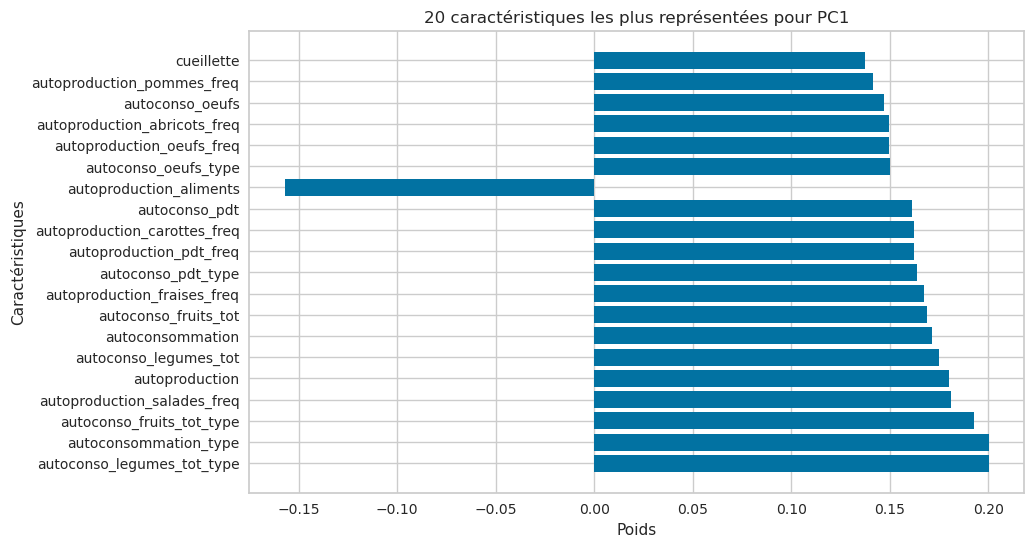

In [13]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC1
pc1_top_features_abs = pca_components.iloc[0].abs().nlargest(20, keep='all')
pc1_top_features = pca_components.iloc[0].loc[pc1_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_top_features.index, pc1_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC1')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

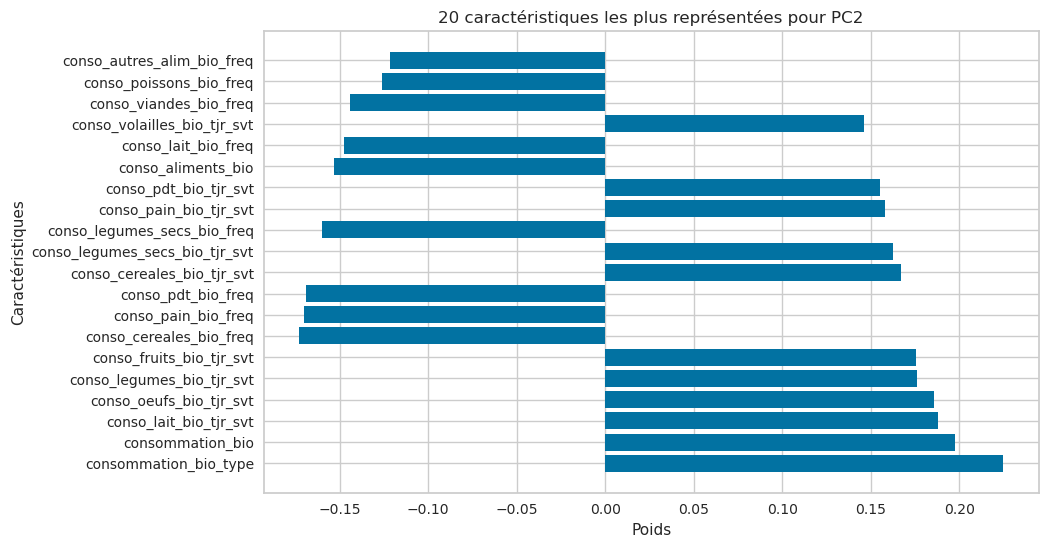

In [14]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC2
pc2_top_features_abs = pca_components.iloc[1].abs().nlargest(20, keep='all')
pc2_top_features = pca_components.iloc[1].loc[pc2_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC2
plt.figure(figsize=(10, 6))
plt.barh(pc2_top_features.index, pc2_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC2')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

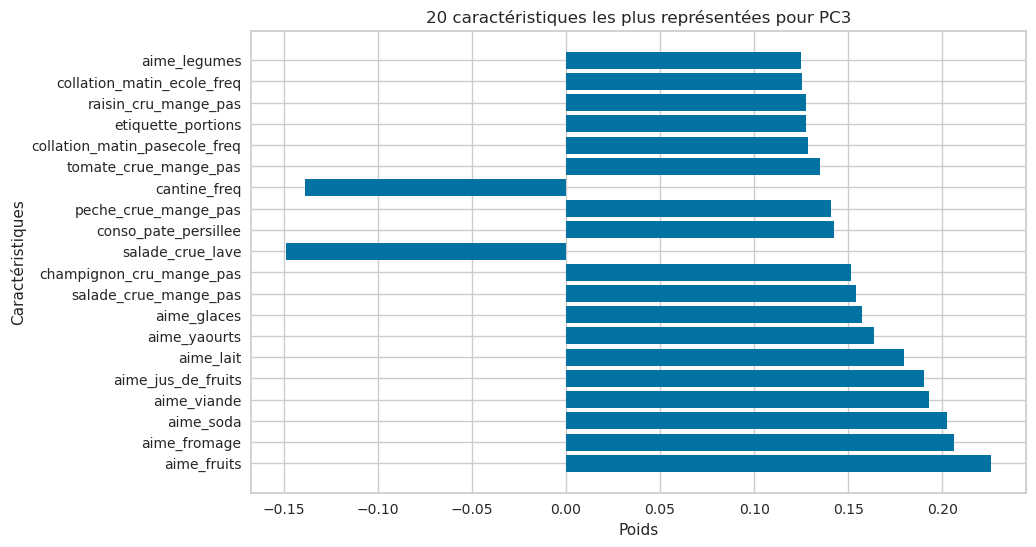

In [15]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC3
pc3_top_features_abs = pca_components.iloc[2].abs().nlargest(20, keep='all')
pc3_top_features = pca_components.iloc[2].loc[pc3_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC3
plt.figure(figsize=(10, 6))
plt.barh(pc3_top_features.index, pc3_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC3')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

#### Clusters K-Means

In [17]:
# Effectuer le clustering par K-moyennes
k = 4  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(habitudes_indiv_for_clustering_array)

pca_df['Cluster'] = clusters

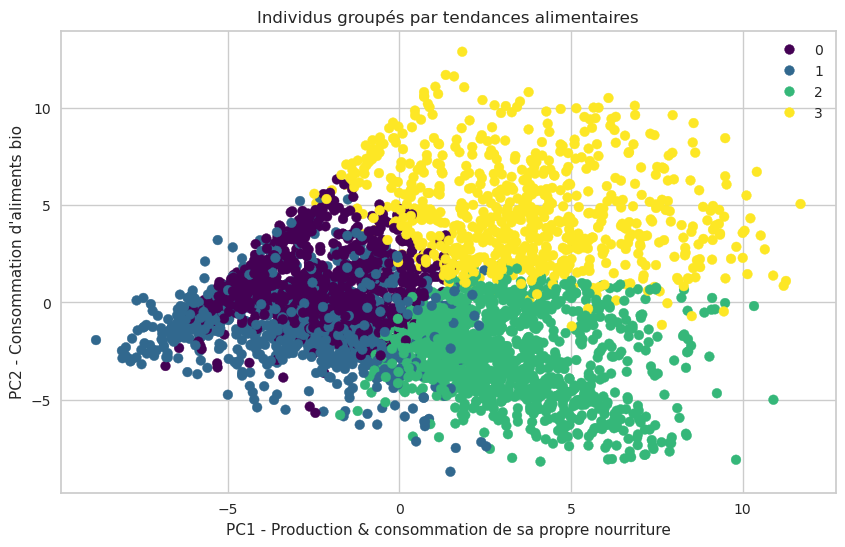

In [18]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
# scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par tendances alimentaires')
plt.xlabel('PC1 - Production & consommation de sa propre nourriture')
plt.ylabel('PC2 - Consommation d\'aliments bio')
# plt.zlabel('PC3 - Goûts alimentaires')
plt.show()

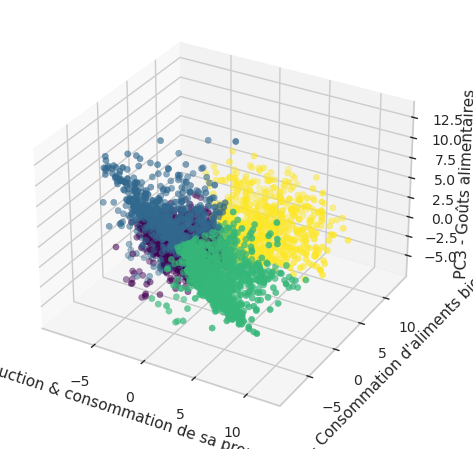

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = pca_df['PC1']
ys = pca_df['PC2']
zs = pca_df['PC3']
ax.scatter(xs, ys, zs, c=pca_df['Cluster'], cmap='viridis')

ax.set_xlabel('PC1 - Production & consommation de sa propre nourriture')
ax.set_ylabel('PC2 - Consommation d\'aliments bio')
ax.set_zlabel('PC3 - Goûts alimentaires')

plt.show()

#### Clusters CAH

In [20]:
# Utiliser la méthode linkage pour effectuer le clustering hiérarchique
cah = linkage(habitudes_indiv_for_clustering_array, method='ward')

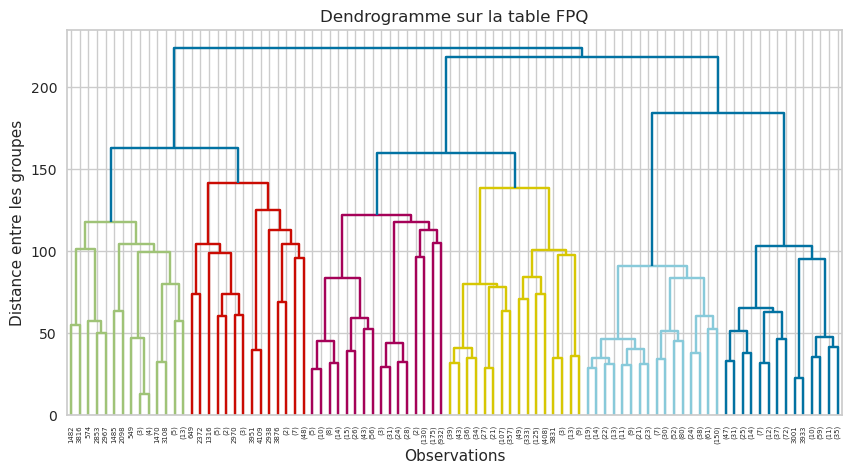

In [21]:
profondeur_dendrogramme_a_afficher = 6

# Afficher le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(cah,
           truncate_mode='level',
           p=profondeur_dendrogramme_a_afficher)
plt.title("Dendrogramme sur la table FPQ")
plt.xlabel("Observations")
plt.ylabel("Distance entre les groupes")
plt.show()

In [22]:
# Effectuer le clustering par CAH
k = 3  # Nombre de clusters souhaité
clusters = fcluster(cah, k, criterion='maxclust')

pca_df['Cluster'] = clusters

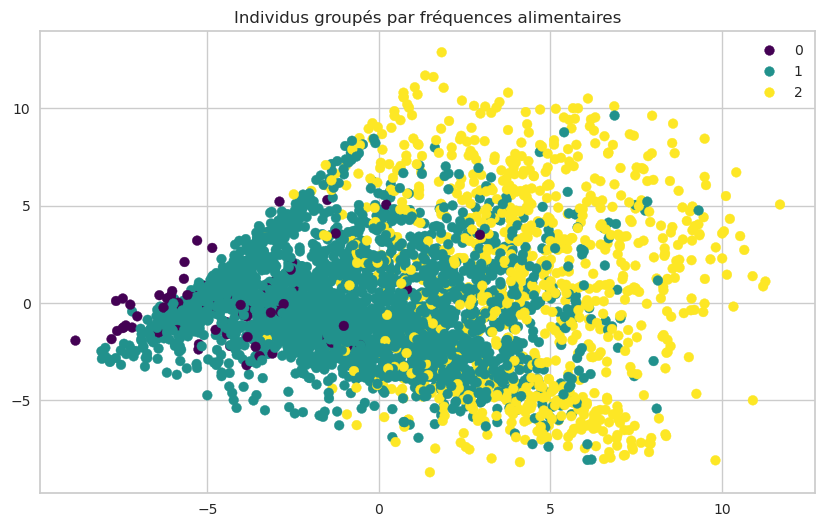

In [23]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
# scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par fréquences alimentaires')
# plt.xlabel('PC1 - Consommation de tomates (et autres fruits & légumes)')
# plt.ylabel('PC2 - Consommation d\'agrumes et autres fruits (ex: pomme)')
# plt.zlabel('PC3 - Consommation de soda et junk food')
plt.show()

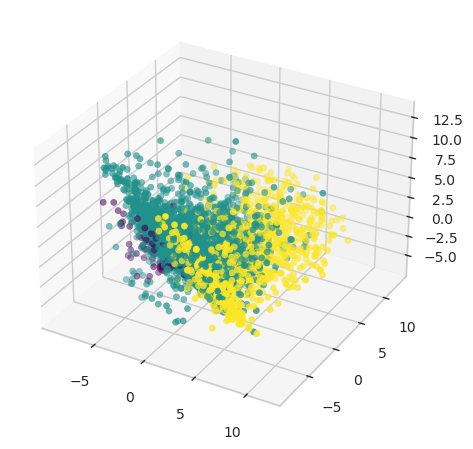

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = pca_df['PC1']
ys = pca_df['PC2']
zs = pca_df['PC3']
ax.scatter(xs, ys, zs, c=pca_df['Cluster'], cmap='viridis')

# ax.set_xlabel('Consommation de tomates (et autres fruits & légumes)')
# ax.set_ylabel('Consommation d\'agrumes et autres fruits (ex: pomme)')
# ax.set_zlabel('PC3 - Consommation de soda et junk food')

plt.show()

### Clustering sur l'activité physique

#### Preprocessing

In [9]:
actphys_sedent.shape

NameError: name 'actphys_sedent' is not defined

In [ ]:
# Sélectionner les caractéristiques pour le clustering
actphys_sedent_for_clustering = actphys_sedent.drop(
    ['POPULATION', 'NOIND'],
    axis=1
).dropna(
    axis=1, how='all'
).select_dtypes(
    include=np.number
)
actphys_sedent_for_clustering.shape

In [ ]:
# Gérer les valeurs manquantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
actphys_sedent_for_clustering_array = imputer.fit_transform(actphys_sedent_for_clustering)

In [ ]:
# Normaliser les colonnes
scaler = StandardScaler()
actphys_sedent_for_clustering_array = scaler.fit_transform(actphys_sedent_for_clustering_array)

In [ ]:
# Détecter et retirer les outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=0)
outlier_labels = outlier_detector.fit_predict(actphys_sedent_for_clustering_array)
actphys_sedent_for_clustering_array = actphys_sedent_for_clustering_array[outlier_labels == 1]
actphys_sedent_for_clustering_array.shape

#### ACP

In [ ]:
# Effectuer l'ACP
pca = PCA(n_components=3)
pca_result = pca.fit_transform(actphys_sedent_for_clustering_array)

# Obtenir les poids des caractéristiques pour chaque composante principale
pca_components = pd.DataFrame(pca.components_, columns=actphys_sedent_for_clustering.columns)

In [ ]:
# Créer un dataframe pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

In [ ]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC1
pc1_top_features_abs = pca_components.iloc[0].abs().nlargest(20, keep='all')
pc1_top_features = pca_components.iloc[0].loc[pc1_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_top_features.index, pc1_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC1')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

In [ ]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC2
pc2_top_features_abs = pca_components.iloc[1].abs().nlargest(20, keep='all')
pc2_top_features = pca_components.iloc[1].loc[pc2_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC2
plt.figure(figsize=(10, 6))
plt.barh(pc2_top_features.index, pc2_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC2')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

In [ ]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC3
pc3_top_features_abs = pca_components.iloc[2].abs().nlargest(20, keep='all')
pc3_top_features = pca_components.iloc[2].loc[pc3_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC3
plt.figure(figsize=(10, 6))
plt.barh(pc3_top_features.index, pc3_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC3')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

#### Clusters K-Means

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=(1,10))
elbow_method.fit(actphys_sedent_for_clustering_array)

In [ ]:
# Effectuer le clustering par K-moyennes
k = 2  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(actphys_sedent_for_clustering_array)

pca_df['Cluster'] = clusters

In [ ]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
# scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par activité physique')
plt.xlabel('PC1 - Activité')
plt.ylabel('PC2 - Absence de sédentarité')
# plt.zlabel('PC3 - Temps passé assis')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = pca_df['PC1']
ys = pca_df['PC2']
zs = pca_df['PC3']
ax.scatter(xs, ys, zs, c=pca_df['Cluster'], cmap='viridis')

ax.set_xlabel('PC1 - Activité')
ax.set_ylabel('PC2 - Absence de sédentarité')
ax.set_zlabel('PC3 - Temps passé assis')

plt.show()

#### Clusters CAH

In [ ]:
# Utiliser la méthode linkage pour effectuer le clustering hiérarchique
cah = linkage(actphys_sedent_for_clustering_array, method='ward')

In [10]:
profondeur_dendrogramme_a_afficher = 6

# Afficher le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(cah,
           truncate_mode='level',
           p=profondeur_dendrogramme_a_afficher)
plt.title("Dendrogramme sur la table FPQ")
plt.xlabel("Observations")
plt.ylabel("Distance entre les groupes")
plt.show()

NameError: name 'dendrogram' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Effectuer le clustering par CAH
k = 2  # Nombre de clusters souhaité
clusters = fcluster(cah, k, criterion='maxclust')

pca_df['Cluster'] = clusters

In [ ]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
# scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par fréquences alimentaires')
# plt.xlabel('PC1 - Consommation de tomates (et autres fruits & légumes)')
# plt.ylabel('PC2 - Consommation d\'agrumes et autres fruits (ex: pomme)')
# plt.zlabel('PC3 - Consommation de soda et junk food')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = pca_df['PC1']
ys = pca_df['PC2']
zs = pca_df['PC3']
ax.scatter(xs, ys, zs, c=pca_df['Cluster'], cmap='viridis')

# ax.set_xlabel('Consommation de tomates (et autres fruits & légumes)')
# ax.set_ylabel('Consommation d\'agrumes et autres fruits (ex: pomme)')
# ax.set_zlabel('PC3 - Consommation de soda et junk food')

plt.show()

### Clustering fréquentiel alimentaire

#### Preprocessing

In [ ]:
fpq.shape

In [ ]:
# Sélectionner les caractéristiques pour le clustering
fpq_for_clustering = fpq.drop(
    ['POPULATION', 'NOIND'],
    axis=1
).dropna(
    axis=1, how='all'
).select_dtypes(
    include=np.number
)
fpq_for_clustering.shape

In [ ]:
# Gérer les valeurs manquantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
fpq_for_clustering_array = imputer.fit_transform(fpq_for_clustering)

In [ ]:
# Normaliser les colonnes
scaler = StandardScaler()
fpq_for_clustering_array = scaler.fit_transform(fpq_for_clustering_array)

In [ ]:
# Détecter et retirer les outliers
outlier_detector = IsolationForest(contamination=0.05, random_state=0)
outlier_labels = outlier_detector.fit_predict(fpq_for_clustering_array)
fpq_for_clustering_array = fpq_for_clustering_array[outlier_labels == 1]
fpq_for_clustering_array.shape

#### ACP

In [ ]:
# Effectuer l'ACP
pca = PCA(n_components=3)
pca_result = pca.fit_transform(fpq_for_clustering_array)

# Obtenir les poids des caractéristiques pour chaque composante principale
pca_components = pd.DataFrame(pca.components_, columns=fpq_for_clustering.columns)

In [ ]:
# Créer un dataframe pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

In [ ]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC1
pc1_top_features_abs = pca_components.iloc[0].abs().nlargest(20, keep='all')
pc1_top_features = pca_components.iloc[0].loc[pc1_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_top_features.index, pc1_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC1')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

In [ ]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC2
pc2_top_features_abs = pca_components.iloc[1].abs().nlargest(20, keep='all')
pc2_top_features = pca_components.iloc[1].loc[pc2_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC2
plt.figure(figsize=(10, 6))
plt.barh(pc2_top_features.index, pc2_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC2')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

In [ ]:
# Sélectionner les 20 caractéristiques les plus représentées pour PC3
pc3_top_features_abs = pca_components.iloc[2].abs().nlargest(20, keep='all')
pc3_top_features = pca_components.iloc[2].loc[pc3_top_features_abs.index]

# Afficher les poids des caractéristiques pour PC3
plt.figure(figsize=(10, 6))
plt.barh(pc3_top_features.index, pc3_top_features.values)
plt.title('20 caractéristiques les plus représentées pour PC3')
plt.xlabel('Poids')
plt.ylabel('Caractéristiques')
plt.show()

#### Clusters K-Means

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=(1,10))
elbow_method.fit(fpq_for_clustering_array)

In [ ]:
# Effectuer le clustering par K-moyennes
k = 4  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(fpq_for_clustering_array)

pca_df['Cluster'] = clusters

In [ ]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
# scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par fréquences alimentaires')
plt.xlabel('PC1 - Consommation de tomates (et autres fruits & légumes)')
plt.ylabel('PC2 - Consommation d\'agrumes et autres fruits (ex: pomme)')
# plt.zlabel('PC3 - Consommation de soda et junk food')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = pca_df['PC1']
ys = pca_df['PC2']
zs = pca_df['PC3']
ax.scatter(xs, ys, zs, c=pca_df['Cluster'], cmap='viridis')

ax.set_xlabel('Consommation de tomates (et autres fruits & légumes)')
ax.set_ylabel('Consommation d\'agrumes et autres fruits (ex: pomme)')
ax.set_zlabel('PC3 - Consommation de soda et junk food')

plt.show()

#### Clusters CAH

In [ ]:
# Utiliser la méthode linkage pour effectuer le clustering hiérarchique
cah = linkage(fpq_for_clustering_array, method='ward')

In [ ]:
profondeur_dendrogramme_a_afficher = 6

# Afficher le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(cah,
           truncate_mode='level',
           p=profondeur_dendrogramme_a_afficher)
plt.title("Dendrogramme sur la table FPQ")
plt.xlabel("Observations")
plt.ylabel("Distance entre les groupes")
plt.show()

In [ ]:
# Effectuer le clustering par CAH
k = 3  # Nombre de clusters souhaité
clusters = fcluster(cah, k, criterion='maxclust')

pca_df['Cluster'] = clusters

In [ ]:
# Afficher le graphique des clusters en 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
# scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=range(k))
plt.title('Individus groupés par fréquences alimentaires')
# plt.xlabel('PC1 - Consommation de tomates (et autres fruits & légumes)')
# plt.ylabel('PC2 - Consommation d\'agrumes et autres fruits (ex: pomme)')
# plt.zlabel('PC3 - Consommation de soda et junk food')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = pca_df['PC1']
ys = pca_df['PC2']
zs = pca_df['PC3']
ax.scatter(xs, ys, zs, c=pca_df['Cluster'], cmap='viridis')

# ax.set_xlabel('Consommation de tomates (et autres fruits & légumes)')
# ax.set_ylabel('Consommation d\'agrumes et autres fruits (ex: pomme)')
# ax.set_zlabel('PC3 - Consommation de soda et junk food')

plt.show()

### Autres analyses